In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/pizza_steak.zip",'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
# ls pizza_steak/train/steak
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
classnames = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [5]:
import os

for dirpath , dirname,filename in os.walk('pizza_steak'):
  print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
len(os.listdir('pizza_steak/test/pizza'))

250

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def viewrandom(targetdir,targetclass):
  target_folder = targetdir+targetclass
  randomimage= random.sample(os.listdir(target_folder), 1)
  image=mpimg.imread(target_folder + '/' + randomimage[0])
  plt.imshow(image)
  plt.title(targetclass)
  plt.axis('off')
  print(image.shape)

  return image

(512, 512, 3)


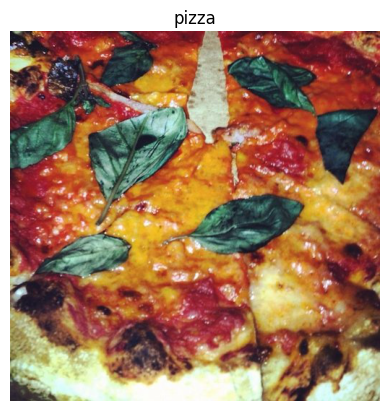

In [8]:
img =viewrandom("pizza_steak/train/","pizza")

In [9]:
img.shape

(512, 512, 3)

In [10]:
img/255

array([[[0.10196078, 0.09803922, 0.16078431],
        [0.09019608, 0.08627451, 0.14117647],
        [0.10588235, 0.11764706, 0.14509804],
        ...,
        [0.54901961, 0.29411765, 0.18431373],
        [0.61568627, 0.34901961, 0.21176471],
        [0.61568627, 0.33333333, 0.17647059]],

       [[0.09019608, 0.07843137, 0.14509804],
        [0.09411765, 0.09019608, 0.14509804],
        [0.09411765, 0.10588235, 0.13333333],
        ...,
        [0.50588235, 0.23137255, 0.13333333],
        [0.56862745, 0.28235294, 0.15686275],
        [0.56078431, 0.27058824, 0.13333333]],

       [[0.0745098 , 0.05882353, 0.1254902 ],
        [0.10196078, 0.09411765, 0.14901961],
        [0.08627451, 0.08627451, 0.1254902 ],
        ...,
        [0.51764706, 0.21568627, 0.14509804],
        [0.54901961, 0.24313725, 0.15294118],
        [0.53333333, 0.21960784, 0.11372549]],

       ...,

       [[0.16470588, 0.14509804, 0.16862745],
        [0.16862745, 0.14901961, 0.17254902],
        [0.16862745, 0

In [11]:
import tensorflow as tf
img= tf.constant(img)

In [12]:
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 26,  25,  41],
        [ 23,  22,  36],
        [ 27,  30,  37],
        ...,
        [140,  75,  47],
        [157,  89,  54],
        [157,  85,  45]],

       [[ 23,  20,  37],
        [ 24,  23,  37],
        [ 24,  27,  34],
        ...,
        [129,  59,  34],
        [145,  72,  40],
        [143,  69,  34]],

       [[ 19,  15,  32],
        [ 26,  24,  38],
        [ 22,  22,  32],
        ...,
        [132,  55,  37],
        [140,  62,  39],
        [136,  56,  29]],

       ...,

       [[ 42,  37,  43],
        [ 43,  38,  44],
        [ 43,  38,  44],
        ...,
        [109, 110,  76],
        [118, 118,  84],
        [160, 157, 124]],

       [[ 43,  38,  42],
        [ 43,  38,  44],
        [ 42,  37,  43],
        ...,
        [111, 111,  77],
        [142, 137, 105],
        [181, 175, 143]],

       [[ 49,  44,  48],
        [ 48,  43,  47],
        [ 47,  42,  48],
        ...,
        [120, 120,  8

In [13]:
img.shape

TensorShape([512, 512, 3])

In [14]:
# load the data
# preprocess our data
# build a cnn to find pattern in our images
# compile CNN
# Fit the CNN

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)


# preprocess the data  to get the all the pixel value between 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen =ImageDataGenerator(rescale=1./255)



# data direction path
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"


train_data= train_datagen.flow_from_directory(directory=train_dir, batch_size=32,class_mode='binary',target_size=(224,224),seed=42   )
valid_data=test_datagen.flow_from_directory(directory=test_dir, batch_size=32,class_mode='binary',target_size=(224,224),seed=42   )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:

len(train_data)

47

In [17]:
len(valid_data)

16

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model_1= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

his=model_1.fit(
    train_data,
    epochs=5,
    validation_data= valid_data,
    validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 26s 274ms/step - loss: 0.6021 - accuracy: 0.6800 - val_loss: 0.4460 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 0.4594 - accuracy: 0.8000 - val_loss: 0.3860 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 12s 247ms/step - loss: 0.4494 - accuracy: 0.8073 - val_loss: 0.4122 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 11s 245ms/step - loss: 0.4199 - accuracy: 0.8220 - val_loss: 0.3722 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3526 - accuracy: 0.8420 - val_loss: 0.3872 - val_accuracy: 0.8000


In [20]:

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [21]:
tf.random.set_seed(42)

model_2= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(
  loss='binary_crossentropy',
  optimizer=tf.keras.optimizers.Adam(),
   metrics=['accuracy']

)

model_2.fit(
  train_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_data=valid_data,
  validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 12s 203ms/step - loss: 0.7575 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 261ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000


In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [23]:
labels=train_data.next()

In [24]:
# Fitting a machine learning model comes in 3 steps
#  create baseline
#  repeat the baseline by overfitting a large model
#  reduce overfitting

# ways to induce overfitting
# increase the number of convolution layer and filters
# add another dance layer to the output of our flattened layer


# Reduce overfitting
# add data augmentation regularisation layers such as Max pool 2D
#  add more data

In [25]:
model_3=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [26]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 13s 241ms/step - loss: 0.5728 - accuracy: 0.7273 - val_loss: 0.4097 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4265 - accuracy: 0.8147 - val_loss: 0.3556 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4129 - accuracy: 0.8233 - val_loss: 0.3765 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3903 - accuracy: 0.8267 - val_loss: 0.3376 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 12s 267ms/step - loss: 0.3567 - accuracy: 0.8580 - val_loss: 0.3372 - val_accuracy: 0.8360


In [28]:
pizza=mpimg.imread("/content/pizza.jpg")

In [29]:
pizza.shape

(533, 800, 3)

In [30]:
# how to reshape the image
def reshape(file):
  img=tf.io.read_file(file)
  img=tf.image.decode_image(img,channels=3)
  img= tf.image.resize(img,size=[224,224])
  img=img/255.
  return img



In [31]:
piz=reshape("/content/pizza.jpg")
piz=tf.expand_dims(piz,axis=0)
piz.shape
model_3.predict(piz)

1/1 [==============================] - 0s 181ms/step


array([[0.0090584]], dtype=float32)

In [32]:
steak=reshape("/content/steak.jpg")
steak=tf.expand_dims(steak,axis=0)
model_3.predict(steak)

1/1 [==============================] - 0s 19ms/step


array([[0.27044934]], dtype=float32)

In [33]:
piz=reshape("/content/pizza-3007395_1280.jpg")
piz=tf.expand_dims(piz,axis=0)
# piz.shape
model_3.predict(piz)

1/1 [==============================] - 0s 18ms/step


array([[0.54647547]], dtype=float32)

In [34]:
def final_func(image):
  new=mpimg.imread(image)
  plt.imshow(new)
  plt.axis(False)
  image=reshape(image)
  image=tf.expand_dims(image,axis=0)
  prediction=model_3.predict(image)
  pred_class = classnames[int(tf.round(prediction)[0][0])]
  return pred_class

1/1 [==============================] - 0s 19ms/step


'pizza'

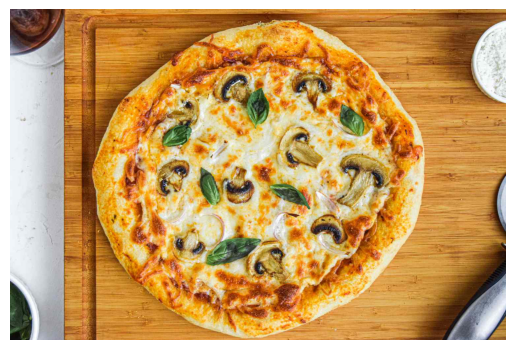

In [35]:
final_func("/content/pizzaaaaaaa.jpg")

1/1 [==============================] - 0s 46ms/step


'steak'

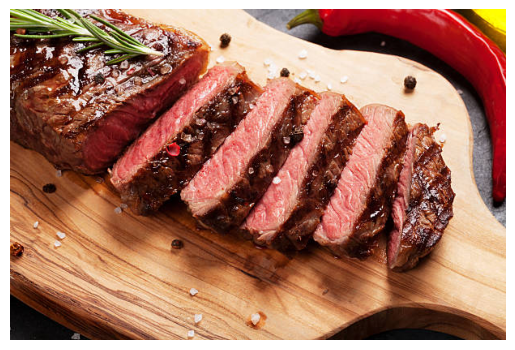

In [38]:
final_func("/content/steak2.jpg")